# Plots for Binning comparison, and Metrics

In [1]:
from __future__ import division
from __future__ import absolute_import
from __future__ import print_function
import os
import six.moves.cPickle as pkl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import MaxNLocator, ScalarFormatter
#from bb.tools.hist_tools_modified import hist, poisson_error
from skhep.visual import MplPlotter as skh_plt
from skhep.modeling import bayesian_blocks
from astropy.stats import knuth_bin_width
from utilities import rough, err_nn, err_li
from vis_comp import comp_study
from scipy import special
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
bb_dir = os.path.join('/Users/brianpollack/Coding/BayesianBlocks')
xlims = (20, 145)
ratlims = (0, 2.5)
n_events = 10000
p0 = 0.05
nep = 20

dy_data = pd.read_pickle(bb_dir+'/files/DY/ZLL_v2.p')
z_data = dy_data.query('50<Mll<140').Mll.values
mu_data = dy_data.query('0<Muon1_Pt').Muon1_Pt.values
eta_data = dy_data.query('0<Muon1_Pt').Muon1_Eta.values
data_shifted = z_data[0:n_events]*1.01
data_nom = z_data[0:n_events]
mc_nominal = z_data[n_events:]

pt_data = pd.read_pickle(bb_dir+'/files/DY/ZLL_Jet1.p')
pt_data = pt_data.query('0<leading_jet_pT<800').reset_index().leading_jet_pT.values
data_nom = pt_data[0:n_events]

0.001 0.08499442536197653
0.001333521432163324 0.08499442536197653
0.0017782794100389228 0.08499442536197653
0.0023713737056616554 0.08499442536197653
0.0031622776601683794 0.04658461676500318
0.004216965034285823 0.04658461676500318
0.005623413251903491 0.10624925298942785
0.007498942093324558 0.10624925298942785
0.01 0.10624925298942785
0.01333521432163324 0.10624925298942785
0.01778279410038923 0.10624925298942785
0.023713737056616554 0.10624925298942785
0.03162277660168379 0.10624925298942785
0.042169650342858224 0.10624925298942785
0.05623413251903491 0.16380617088818655
0.07498942093324558 0.16093387292429637
0.1 0.16093387292429637
0.1333521432163324 0.16093387292429637
0.1778279410038923 0.16093387292429637
0.23713737056616552 1.1504254116446233
0.31622776601683794 1.1369432275125464
0.4216965034285822 1.1048046347675138
0.5623413251903491 1.113732410963979
0.7498942093324559 1.1049633854936929
1.0 1.1303458392716514
0.0031622776601683794 0.04658461676500318
eli: 1705.377484747

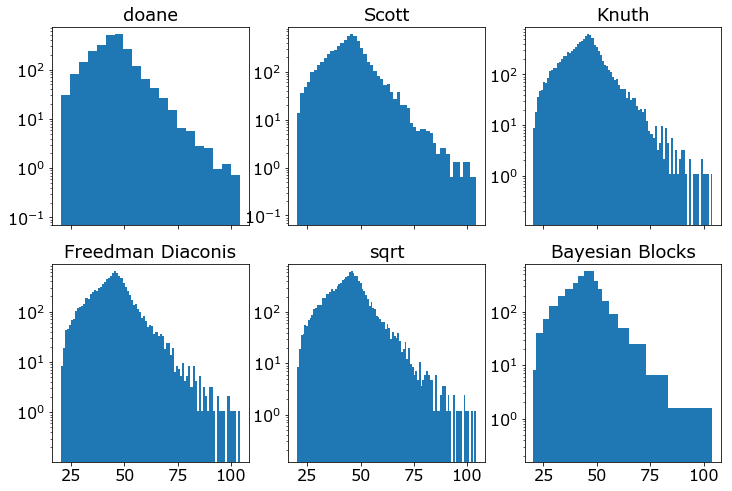

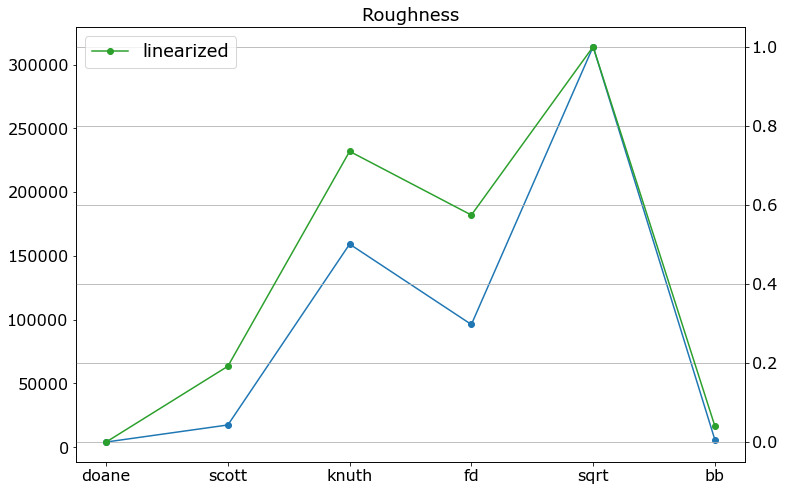

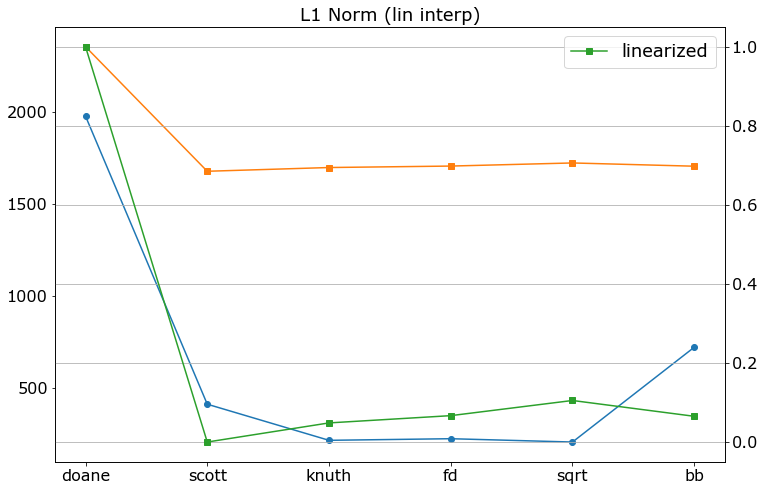

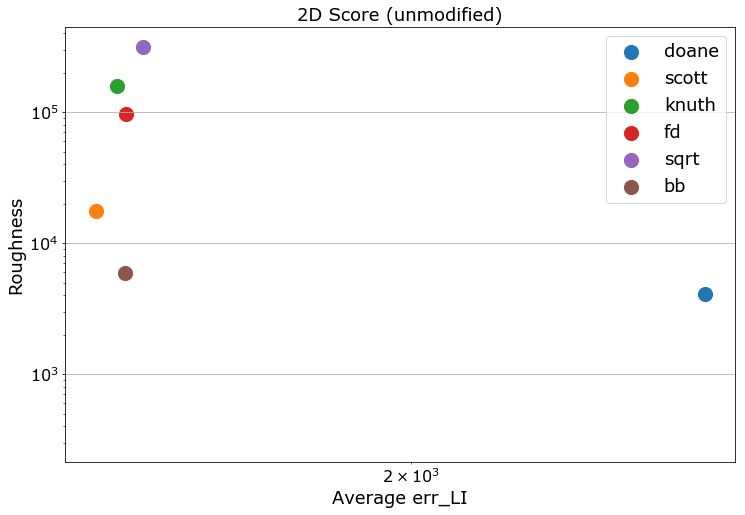

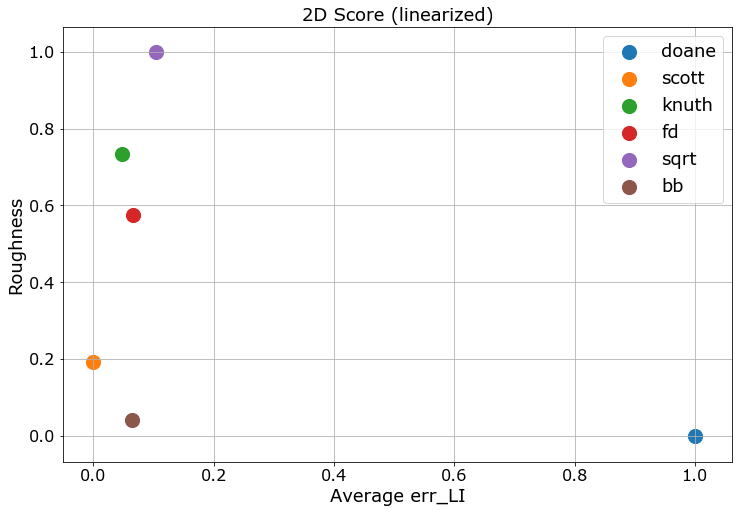

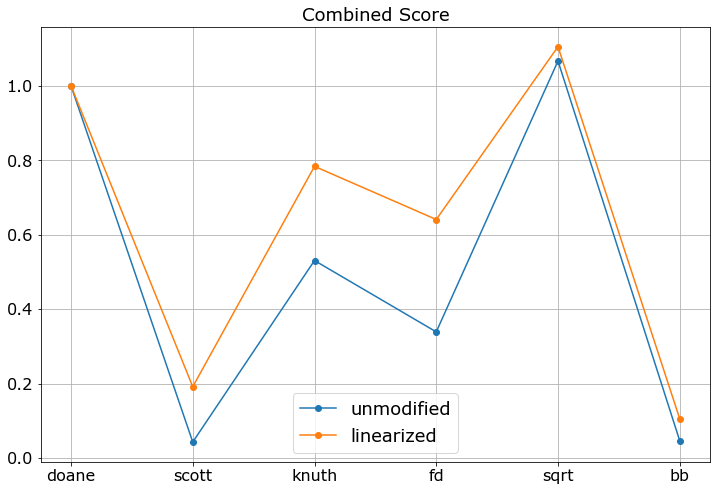

In [20]:
comp_study(mu_data, n_events, p0, xlims=False)

AttributeError: 'numpy.ndarray' object has no attribute 'leading_jet_pT'

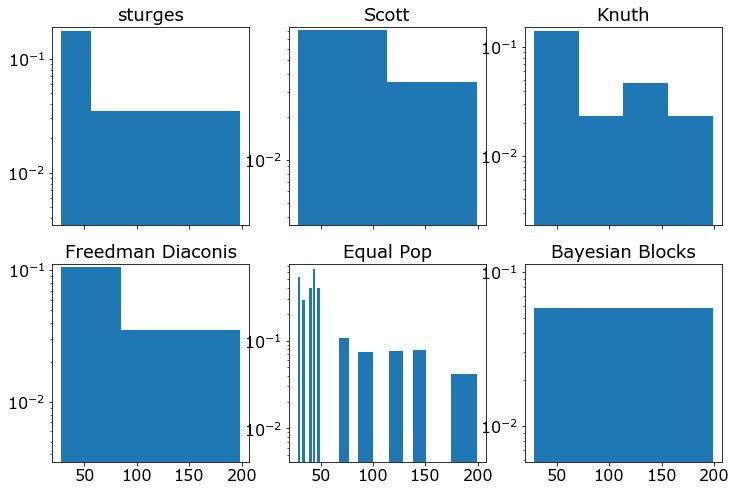

In [42]:
fig, axes = plt.subplots(2,3, sharex=True, sharey=False)
hist_sturges_bw = skh_plt.hist(x=data_nom,histtype='stepfilled', bins='doane', errorbars=False, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian', ax=axes[0][0])
axes[0][0].set_title('sturges')
hist_scott_bw = skh_plt.hist(x=data_nom,histtype='stepfilled', bins='scott', errorbars=False, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian', ax=axes[0][1])
axes[0][1].set_title('Scott')
_, bk = knuth_bin_width(data_nom, return_bins=True)
hist_knuth_bw = skh_plt.hist(x=data_nom,histtype='stepfilled', bins=bk, errorbars=False, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian', ax=axes[0][2])
axes[0][2].set_title('Knuth')
hist_fd_bw = skh_plt.hist(x=data_nom,histtype='stepfilled', bins='fd', errorbars=False, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian', ax=axes[1][0])
axes[1][0].set_title('Freedman Diaconis')
_, bep = pd.qcut(data_nom, nep, retbins=True)
hist_ep_bw = skh_plt.hist(x=data_nom,histtype='stepfilled', bins=bep, errorbars=False, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian', ax=axes[1][1])
axes[1][1].set_title('Equal Pop')
bb = bayesian_blocks(data_nom, p0=p0)
hist_bb_bw = skh_plt.hist(x=data_nom,histtype='stepfilled', bins=bb, errorbars=False, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian', ax=axes[1][2])
axes[1][2].set_title('Bayesian Blocks')

hist_sturges = np.histogram(data_nom, bins='doane')
hist_scott = np.histogram(data_nom, bins='scott')
hist_knuth = np.histogram(data_nom, bins=bk)
hist_fd = np.histogram(data_nom, bins='fd')
hist_ep = np.histogram(data_nom, bins=bep)
hist_bb = np.histogram(data_nom, bins=bb)

r_sturges = rough(hist_sturges_bw)
r_scott = rough(hist_scott_bw)
r_knuth = rough(hist_knuth_bw)
r_fd = rough(hist_fd_bw)
r_ep = rough(hist_ep_bw)
r_bb = rough(hist_bb_bw)

eli_sturges = err_li(data_nom,hist_sturges)
eli_scott = err_li(data_nom,hist_scott)
eli_knuth = err_li(data_nom,hist_knuth)
eli_fd = err_li(data_nom,hist_fd)
eli_ep = err_li(data_nom,hist_ep)
eli_bb = err_li(data_nom,hist_bb)

avg_eli_sturges = []
avg_eli_scott = []
avg_eli_knuth = []
avg_eli_fd = []
avg_eli_ep = []
avg_eli_bb = []
for i in range(1, min(int(len(pt_data)/n_events), 100)):
#for i in range(1, min(int(len(z_data)/n_events), 100)):
    #data = z_data[n_events*i:n_events*(i+1)].Mll.values
    data = pt_data[n_events*i:n_events*(i+1)].leading_jet_pT.values
    avg_eli_sturges.append(err_li(data, hist_sturges))
    avg_eli_scott.append(err_li(data, hist_scott))
    avg_eli_knuth.append(err_li(data, hist_knuth))
    avg_eli_fd.append(err_li(data, hist_fd))
    avg_eli_ep.append(err_li(data, hist_ep))
    avg_eli_bb.append(err_li(data, hist_bb))
    
avg_eli_sturges = np.mean(avg_eli_sturges)
avg_eli_scott = np.mean(avg_eli_scott)
avg_eli_knuth = np.mean(avg_eli_knuth)
avg_eli_fd = np.mean(avg_eli_fd)
avg_eli_ep = np.mean(avg_eli_ep)
avg_eli_bb = np.mean(avg_eli_bb)

rs = [r_sturges, r_scott, r_knuth, r_fd, r_ep, r_bb]
print('rough', rs)
elis = [eli_sturges, eli_scott, eli_knuth, eli_fd, eli_ep, eli_bb]
avg_elis = [avg_eli_sturges, avg_eli_scott, avg_eli_knuth, avg_eli_fd, avg_eli_ep, avg_eli_bb]
xs = ['sturges', 'scott', 'knuth', 'fd', 'ep', 'bb']

plt.figure()
plt.semilogy(xs, rs, 'o-')
plt.grid()
plt.title('Roughness')

plt.figure()
plt.plot(xs, elis, 'o-', label='same set')
plt.plot(xs, avg_elis, 's-', label='average sets')
plt.grid()
plt.legend()
plt.title('L1 Norm (lin interp)')

plt.figure()
for i in range(len(elis)):
    plt.scatter(avg_elis[i], rs[i], label=xs[i], s=200 )
plt.xlabel('Average err_LI')
plt.ylabel('Roughness')
ax = plt.gca()
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.relim()
#ax.autoscale_view()
plt.grid()
plt.legend()
plt.title('L1 Norm (lin interp)')


Text(0.5,1,'Simulated Drell-Yan, Knuth Binning')

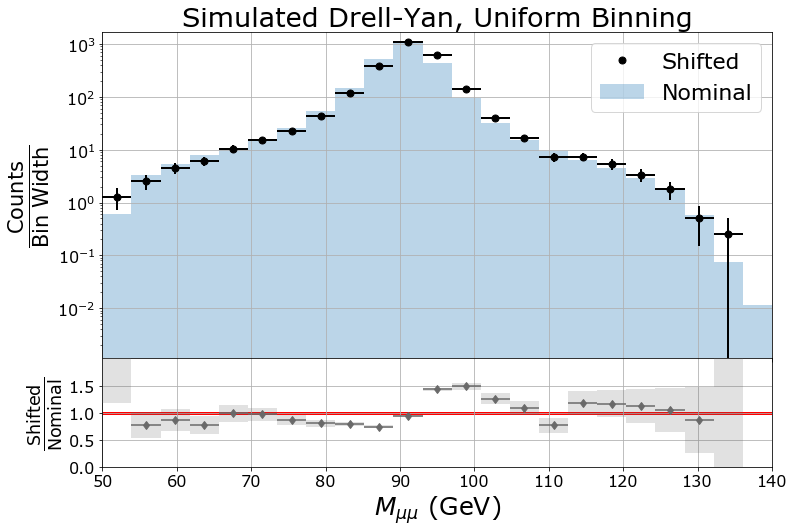

<Figure size 864x576 with 0 Axes>

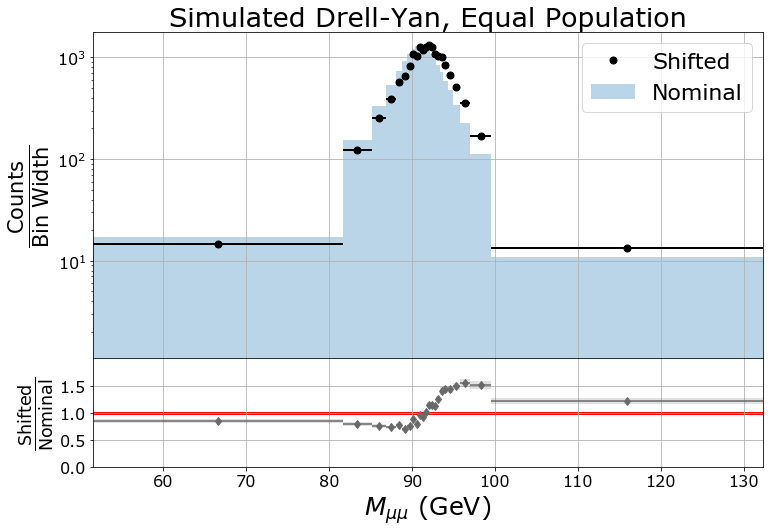

<Figure size 864x576 with 0 Axes>

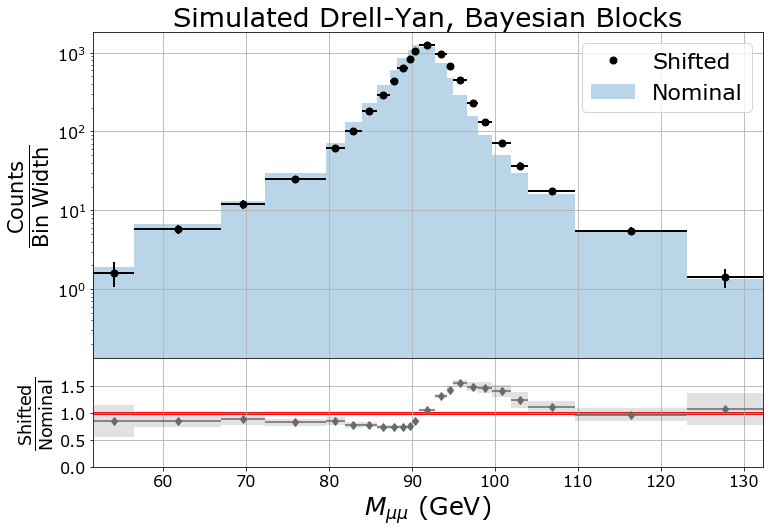

<Figure size 864x576 with 0 Axes>

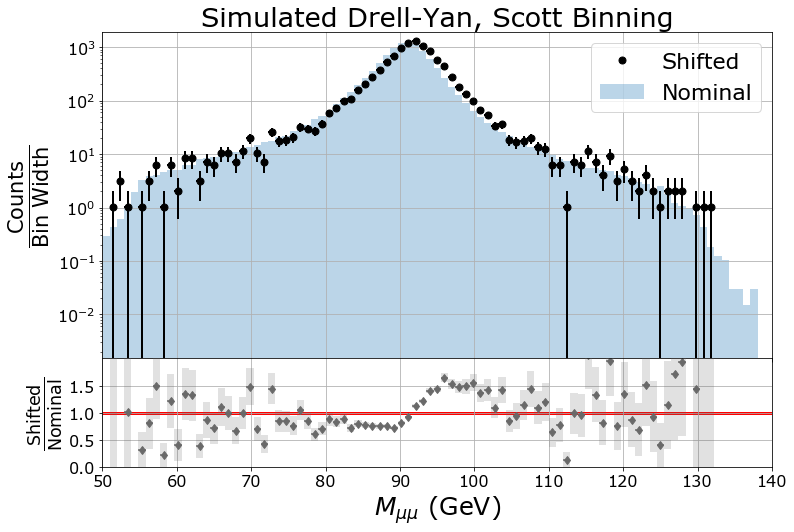

<Figure size 864x576 with 0 Axes>

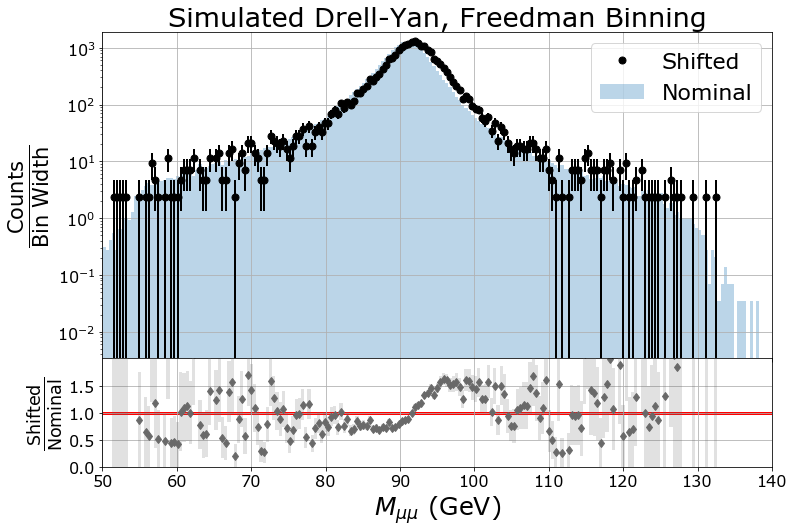

<Figure size 864x576 with 0 Axes>

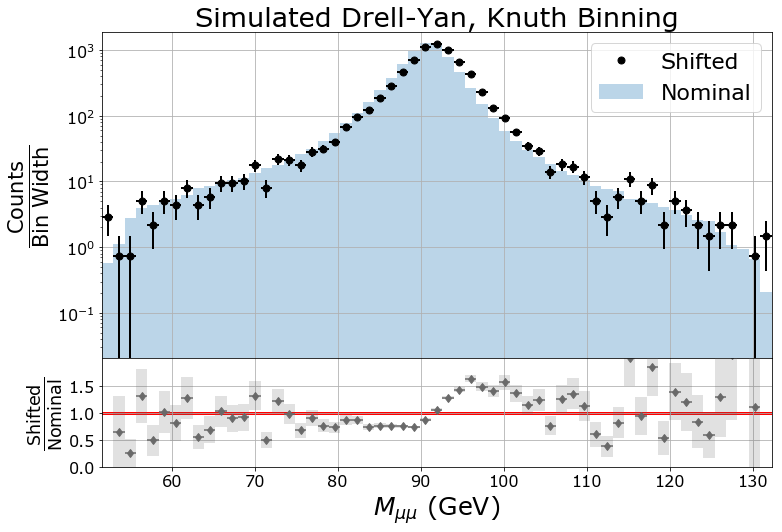

In [6]:
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins=23
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Uniform Binning', fontsize=27)

plt.figure()
_, bep = pd.qcut(data_shifted, 23, retbins=True)
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins=bep
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Equal Population', fontsize=27)


plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins='blocks'
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Bayesian Blocks', fontsize=27)

plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins='scott'
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Scott Binning', fontsize=27)

plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins='fd'
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Freedman Binning', fontsize=27)

plt.figure()
_, bk = knuth_bin_width(data_shifted, return_bins=True)
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins=bk
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Knuth Binning', fontsize=27)

Text(0.3,0.4,'$\\hat{R}$=2.287e-03\nENN=3.416e+03\nELI=3.898e+02')

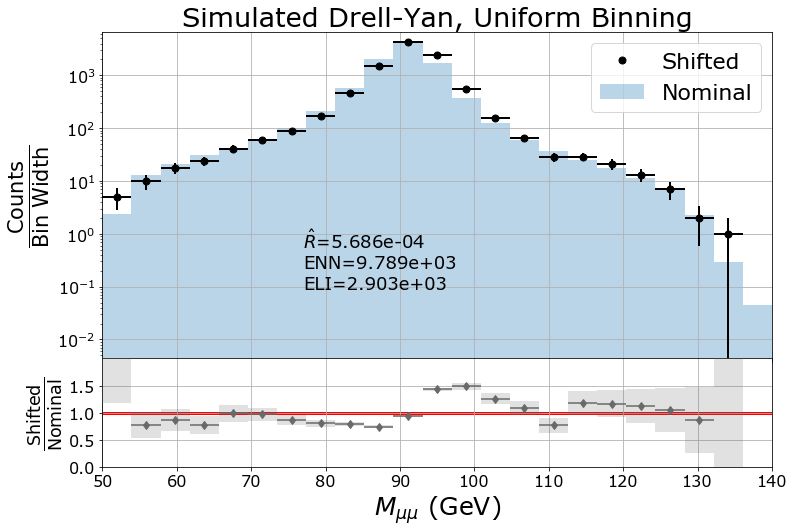

<Figure size 864x576 with 0 Axes>

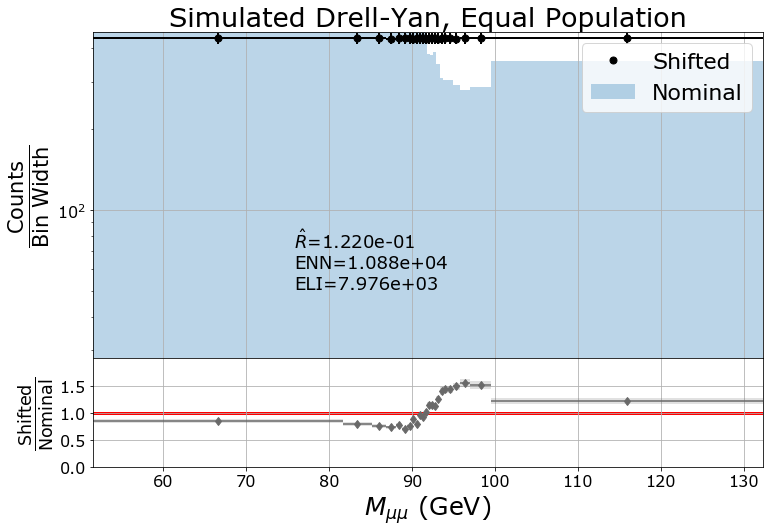

<Figure size 864x576 with 0 Axes>

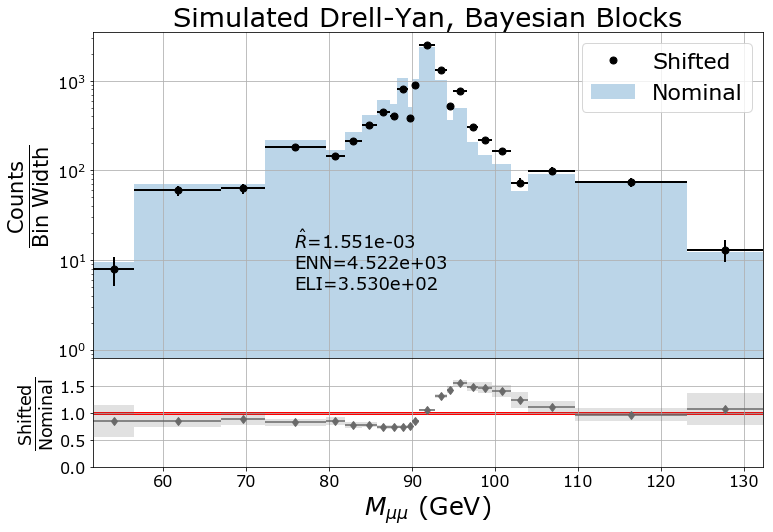

<Figure size 864x576 with 0 Axes>

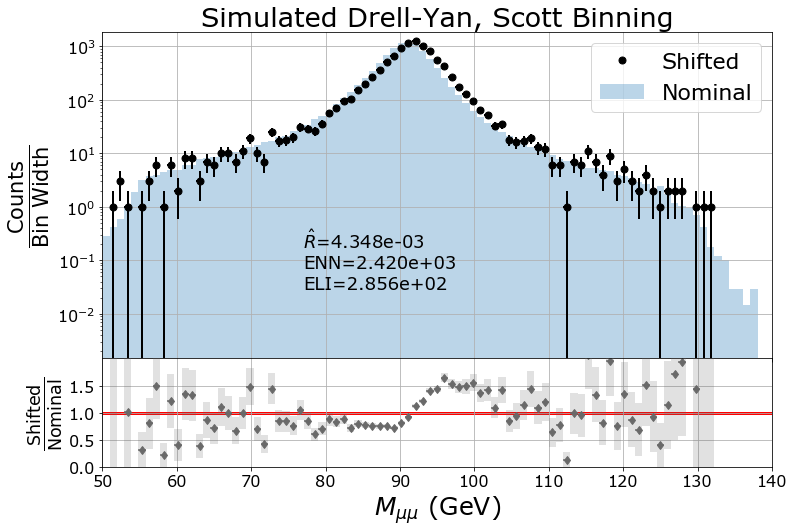

<Figure size 864x576 with 0 Axes>

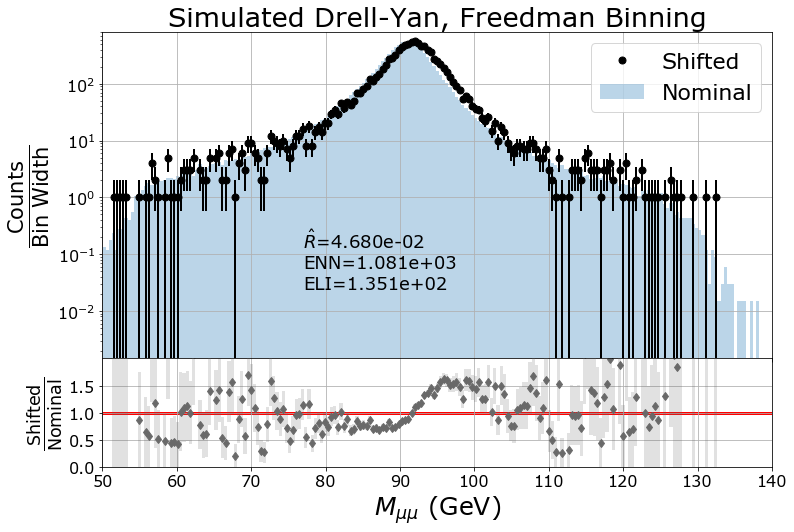

<Figure size 864x576 with 0 Axes>

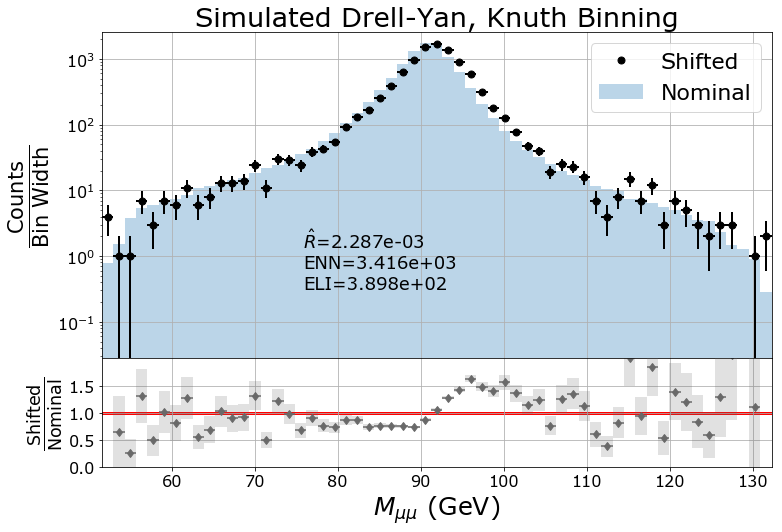

In [30]:
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True,  err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, ),
    range=xlims, bins=23
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Uniform Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')

plt.figure()
_, bep = pd.qcut(data_shifted, 23, retbins=True)
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True,  err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, ),
    range=xlims, bins=bep
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Equal Population', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')


plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True,  err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, ),
    range=xlims, bins='blocks'
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Bayesian Blocks', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')

plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True,  err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, ),
    range=xlims, bins='scott'
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Scott Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')

plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True,  err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, ),
    range=xlims, bins='fd'
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Freedman Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')

plt.figure()
_, bk = knuth_bin_width(data_shifted, return_bins=True)
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True,  err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, ),
    range=xlims, bins=bk
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Knuth Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')

## Jet Pt Plots

In [123]:
pt_data = pd.read_pickle(bb_dir+'/files/DY/ZLL_Jet1.p')
pt_data = pt_data.query('0<leading_jet_pT<800').reset_index().ix[0:9000]
pt_mc = pd.read_pickle(bb_dir+'/files/DY/ZLL_Jet3.p')
pt_mc = pt_mc.query('0<leading_jet_pT<800')
xlims = (pt_data.leading_jet_pT.min(), pt_data.leading_jet_pT.max())
ratlims = (0, 2.5)
n_events = len(pt_data)

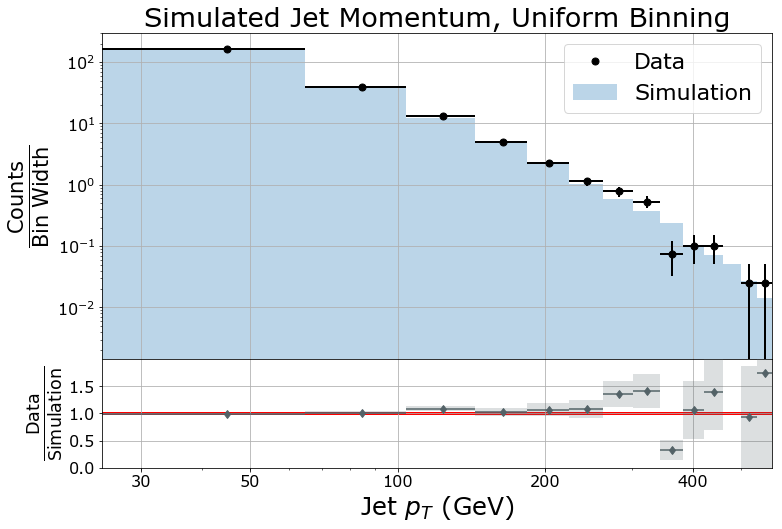

In [126]:
axes, hist1, hist2 = ratio_plot(
    dict(x=pt_data.leading_jet_pT.values,histtype='marker', markersize=7, color='k', errorbars=True, label='Data',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=pt_mc.leading_jet_pT.values, weights=[n_events/len(pt_mc)]*(len(pt_mc)), histtype='stepfilled', alpha=0.3, label='Simulation', log=True, scale='binwidth'),
    range=xlims, bins=14, logx=True
)

axes[0].set_xticks([30, 50, 100, 200, 400])
axes[0].get_xaxis().set_major_formatter(ScalarFormatter())
axes[1].set_xticks([30, 50, 100, 200, 400])
axes[1].get_xaxis().set_major_formatter(ScalarFormatter())

axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Data}{Simulation}}$', fontsize=25)

axes[1].set_xlabel(r'Jet $p_{T}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Jet Momentum, Uniform Binning', fontsize=27)
plt.savefig(bb_dir+'/plots/vis_examples/b14_Jet_comp.pdf')

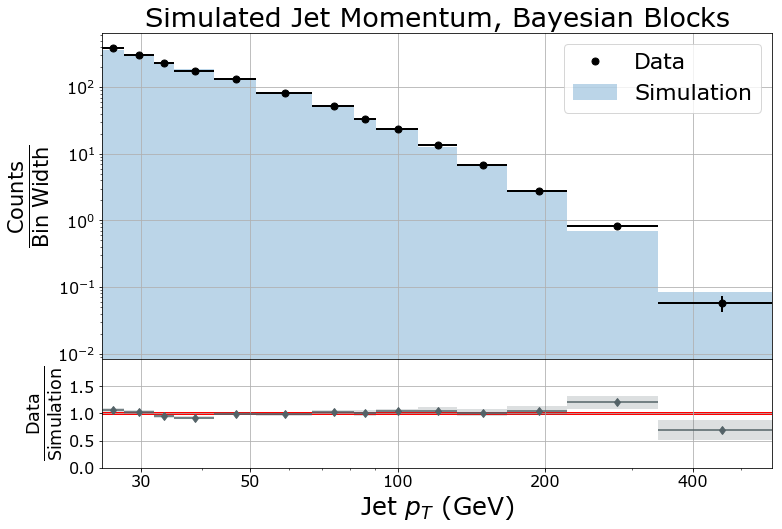

In [127]:
axes, hist1, hist2 = ratio_plot(
    dict(x=pt_data.leading_jet_pT.values,histtype='marker', markersize=7, color='k', errorbars=True, label='Data',alpha=1, log=True, scale='binwidth', err_type='gaussian', p0=0.01),
    dict(x=pt_mc.leading_jet_pT.values, weights=[n_events/len(pt_mc)]*(len(pt_mc)), histtype='stepfilled', alpha=0.3, label='Simulation', log=True, scale='binwidth'),
    range=xlims, bins='blocks', logx=True
)

axes[0].set_xticks([30, 50, 100, 200, 400])
axes[0].get_xaxis().set_major_formatter(ScalarFormatter())
axes[1].set_xticks([30, 50, 100, 200, 400])
axes[1].get_xaxis().set_major_formatter(ScalarFormatter())

axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Data}{Simulation}}$', fontsize=25)

axes[1].set_xlabel(r'Jet $p_{T}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Jet Momentum, Bayesian Blocks', fontsize=27)
plt.savefig(bb_dir+'/plots/vis_examples/bb_Jet_comp.pdf')

In [9]:
data_shifted

array([91.63746656, 89.45525071, 91.71762227, ..., 93.89197135,
       95.10807446, 88.530117  ])

In [12]:
df = pd.Series(data_shifted)
df.qcut(23)

AttributeError: 'Series' object has no attribute 'qcut'

In [25]:
b = pd.qcut(data_shifted, 23, retbins=True)

In [28]:
b[1]

array([ 51.59669763,  81.6308449 ,  85.19306532,  86.90463598,
        88.01330875,  88.77226882,  89.43342752,  89.96688421,
        90.37227773,  90.79581444,  91.140509  ,  91.50808658,
        91.85218264,  92.17802601,  92.52454998,  92.92511824,
        93.34210886,  93.77349432,  94.28672389,  94.92831958,
        95.78392958,  97.01319109,  99.57052659, 132.2503499 ])

In [35]:
rough_scan = []
eli_scan = []
for i in range(1,1000):
    hist_tmp = np.histogram(pt_data[:1000], bins=i)
    rough_scan.append(rough(hist_tmp))
    eli_scan.append(err_li(pt_data[:1000], hist_tmp))
#plt.plot(range(1,1001), np.sqrt(rough_scan))
#plt.figure()
#plt.plot(range(10,5001), eli_scan[9:])


Text(0.5,0,'# of bins')

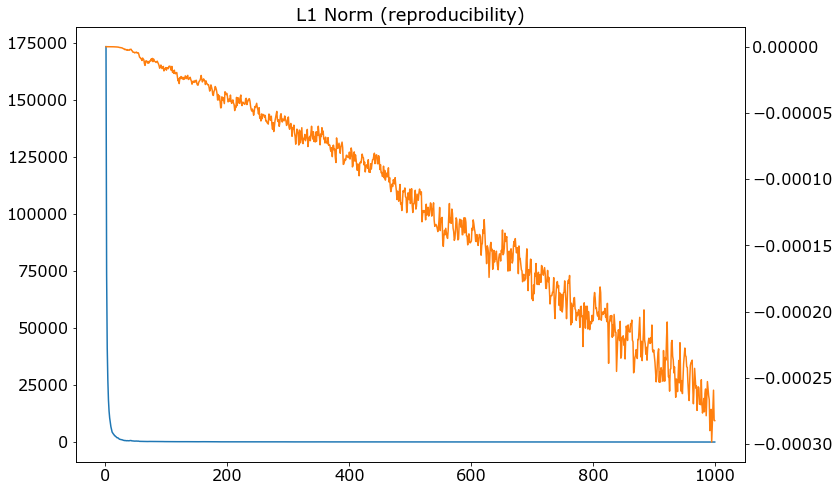

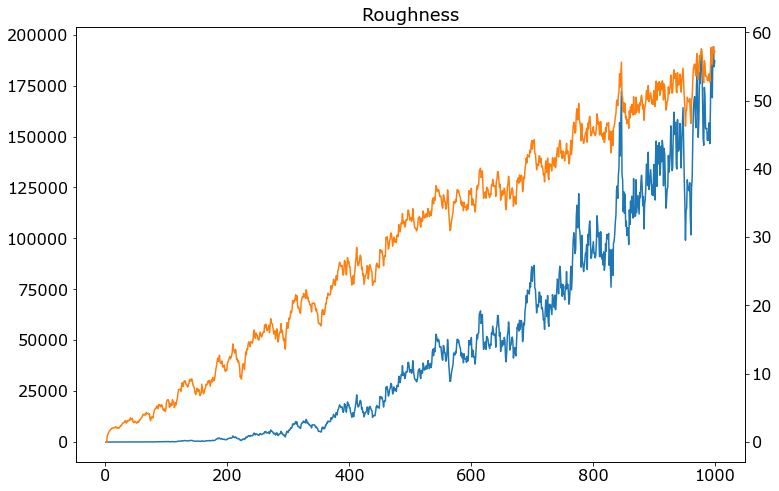

In [36]:
rs_mod = (np.asarray(rough_scan)**(1/3))
elis_mod = (-np.asarray(eli_scan)**(-2))

plt.plot(range(1,1000), eli_scan)
ax2 = plt.gca().twinx()
ax2.plot(range(1,1000), elis_mod, color='C1')
plt.title('L1 Norm (reproducibility)')
plt.xlabel('# of bins')
plt.figure()
plt.plot(range(1,1000), rough_scan)
ax2 = plt.gca().twinx()
ax2.plot(range(1,1000), rs_mod, color='C1')
plt.title('Roughness')
plt.xlabel('# of bins')